In [1]:
%load_ext autoreload
%autoreload 2

In [32]:
from personal_finance.elt.load import read_raw_transactions, read_raw_budgets, ingest_all_files, get_transactions_by_day
from personal_finance.elt.extract import load_mint, last_n_days, extract_last_n_days
from personal_finance.email_budget import get_chart
from personal_finance import settings
import datetime as dt
import os
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import pandas as pd
import requests
import sqlite3

In [65]:
extract_last_n_days(30, headless=True,)
ingested = ingest_all_files('transactions')
budgets = ingest_all_files('budget')

In [67]:
with sqlite3.connect(settings.DATABASE_FILE) as cnxn:
    df = pd.read_sql('select * from mint_transactions', cnxn, parse_dates=['date'])
    

df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
current = df[(df.year == 2020) & (df.month==9) & (df.category == 'Variable Spending')].copy()
current['amount'] = np.where(current['transaction_type']=='debit', current['amount']*-1, current['amount'])

In [68]:
current.sort_values('amount')

,date,description,original_description,amount,transaction_type,category,account_name,labels,notes,year,month
4819,2020-09-06,Amazon,Amazon.com*MU7VA66Q1,-234.55,debit,Variable Spending,CREDIT CARD,None,None,2020,9
4851,2020-09-10,ALPHA OMEGA WINERY,ALPHA OMEGA WINERY,-215.14,debit,Variable Spending,CREDIT CARD,None,None,2020,9
4836,2020-09-07,Instacart,INSTACART*SHOPRITE,-180.00,debit,Variable Spending,CREDIT CARD,None,None,2020,9
4889,2020-09-14,Instacart,INSTACART,-133.27,debit,Variable Spending,CREDIT CARD,None,None,2020,9
4804,2020-09-02,Costco,COSTCO *ANNUAL RENEWAL,-127.95,debit,Variable Spending,CREDIT CARD,None,None,2020,9
...,...,...,...,...,...,...,...,...,...,...,...
4876,2020-09-14,City of Summit,CITY OF SUMMIT TERM 50,-1.50,debit,Variable Spending,CREDIT CARD,None,None,2020,9
4863,2020-09-11,Apple,APPLE.COM/BILL,-0.99,debit,Variable Spending,CREDIT CARD,None,None,2020,9
4843,2020-09-08,Venmo Cashout Ppd,VENMO CASHOUT,46.00,credit,Variable Spending,Spending - 1,None,None,2020,9
4881,2020-09-14,Draftkings Internet Wolf,DRAFTKINGS INTERNET WOLF,50.00,credit,Variable Spending,Spending - 1,None,None,2020,9


In [27]:
from email_budget import get_chart, send_email, chart_title
import calendar

In [37]:
# Contants
def make_chart_and_email():
    today = dt.date.today() - dt.timedelta(1)
    budgets = read_raw_budgets()
    transactions = get_transactions_by_day()

    budget = budgets[(budgets['year']==today.year) & (budgets['month']==today.month)]
    budget = budget[budget['cat']=='Variable Spending']['bgt'].iloc[0]

    current_spend = abs(transactions['Variable Spending'].loc[today.day,f"{today.year}-{('0' + str(today.month))[-2:]}"])

    fig = get_chart(current_spend, budget, today)
    ImgFileName = f"budget_attainment_charts/wolff_budget_{today.year}-{('0' + str(today.month))[-2:]}-{today.day}.png"
    fig.savefig(ImgFileName, bbox_inches = 'tight', pad_inches = .1)
    plt.close()
    send_email('February 2020 Budget Throug The 20th', ImgFileName)
    return None

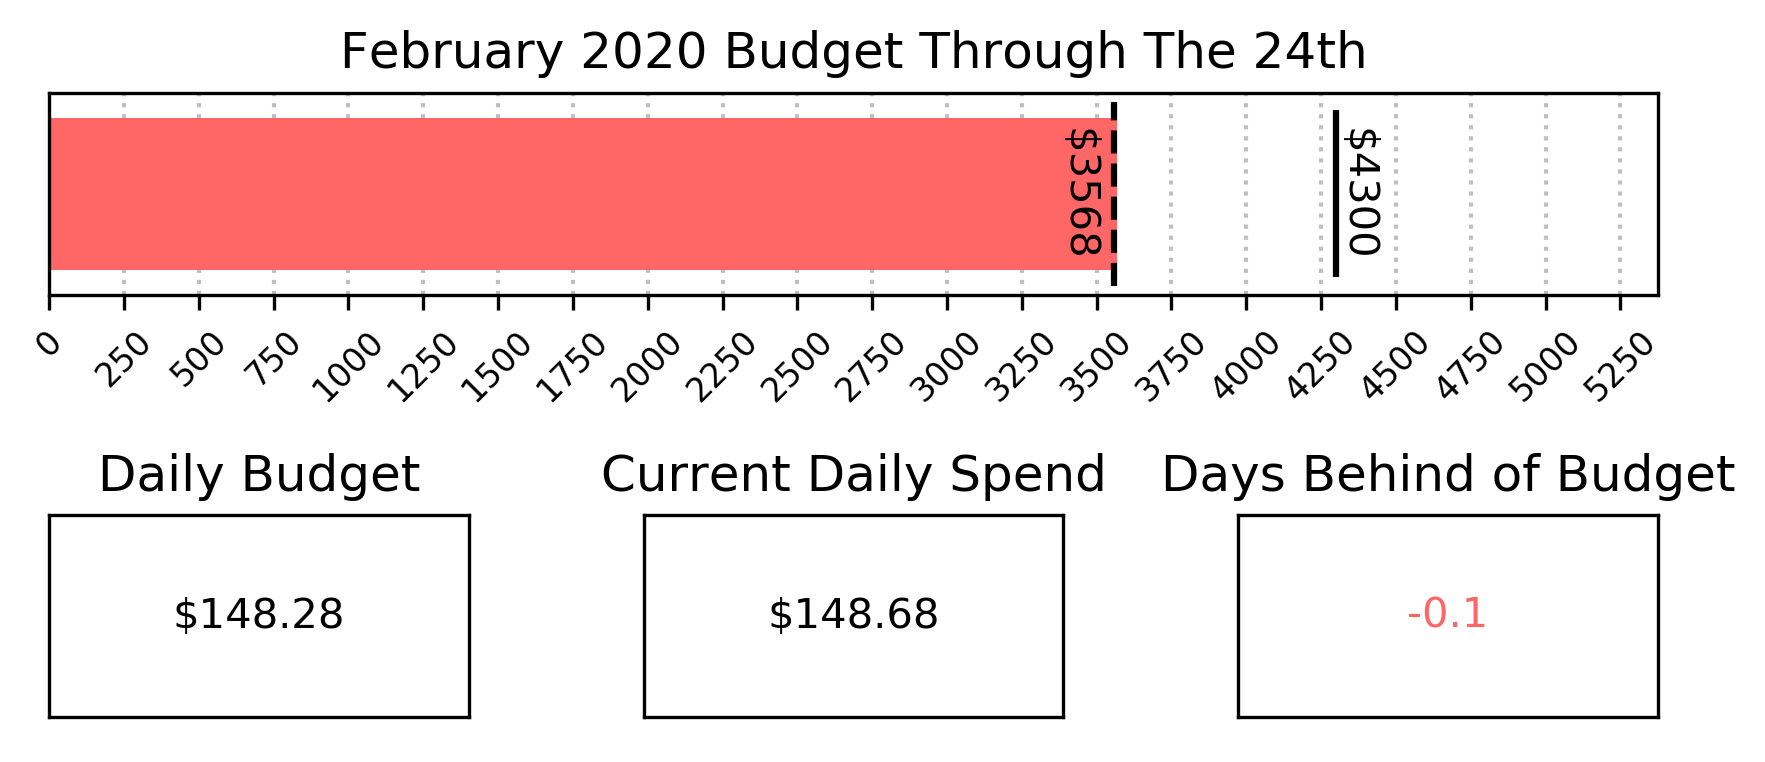

In [38]:
fig


Category = ['Variable Spending', 'Bills', 'Transfers', 'Auto Costs', 'Income']

### Variable Spending

- Expenses that are not recurring

### Bills / Subscriptions
- Recurring Expenses Every Given Period


(221, b'2.0.0 closing connection s48sm1678749qtc.96 - gsmtp')

In [132]:
SendMail(fname, 'Testing')

TypeError: expected string or bytes-like object